In [1]:
import sys
import numpy as np
from matplotlib.pyplot import imread
import pickle
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob

uint8
(224, 224, 3)
[[[250 245 247]
  [250 245 247]
  [250 245 247]
  ...
  [ 35  29  30]
  [ 34  28  29]
  [ 34  28  29]]

 [[250 245 247]
  [250 245 247]
  [250 245 247]
  ...
  [ 35  29  30]
  [ 34  28  29]
  [ 34  28  29]]

 [[250 245 247]
  [250 245 247]
  [250 245 247]
  ...
  [ 34  28  29]
  [ 34  28  29]
  [ 34  28  29]]

 ...

 [[195 184 186]
  [204 193 195]
  [215 204 206]
  ...
  [178 167 169]
  [187 176 178]
  [185 174 176]]

 [[188 177 179]
  [199 188 190]
  [211 200 202]
  ...
  [191 180 182]
  [199 188 190]
  [208 197 199]]

 [[185 174 176]
  [194 183 185]
  [204 193 195]
  ...
  [186 175 177]
  [199 188 190]
  [212 201 203]]]


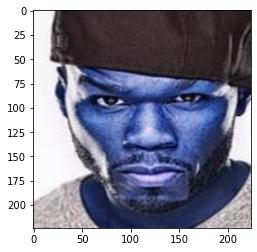

In [3]:
image_path = r'C:\Users\jordan\CFP_Da\train\Data\0\0.jpg'
image = cv2.imread(image_path)
print(image.dtype)
print(image.shape)
print(image)

plt.imshow(image)
plt.show()
# So its BGR

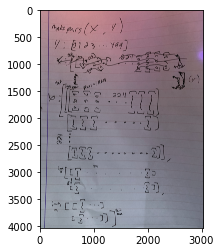

In [4]:
image_path = r'C:\Users\jordan\Desktop\IMG-6446.jpg'
image = cv2.imread(image_path)
plt.imshow(image)
# Make what you drew

In [5]:
# https://www.rapidtables.com/web/color/RGB_Color.html

# So right now, a given image is img1[row_1[ [BGR] [BGR] ]
#                                     row_2[ [BGR] [BGR] ]
#                                     row_n[ [BGR] [BGR] ]]
# I need the following for training rn:

# 1) Convert all images to RGB
# 2) Somehow Create X & Y Sets for Training and Val
# 3) Copy how its done in buildpairs; figure out what (X,Y) rly means
# -  (X,Y) Should look like (array([All X], dtype=uint8), array([All Y], dtype=uint8)) Notice the () around both X, Y

# Y = [1, 2, 3, ... 449]
# X = (X)[
#         (0)[
#             0img0[[RGB_1][RGB_2]~[RGB_224]],
#             0img1[[RGB_1][RGB_2]~[RGB_224]],
#             0img9[[RGB_1][RGB_2]~[RGB_224]]
#          ],
#         (1)[
#             1img0[[RGB_1][RGB_2]~[RGB_224]],
#             1img1[[RGB_1][RGB_2]~[RGB_224]],
#             1img9[[RGB_1][RGB_2]~[RGB_224]]
#          ],
#         ...
#         (449)[
#             449img0[[RGB_1][RGB_2]~[RGB_224]],
#             449img1[[RGB_1][RGB_2]~[RGB_224]],
#             449img9[[RGB_1][RGB_2]~[RGB_224]]
#          ],
#              ]
# Should end up with X.shape = (4500, 224, 224, 3)
# And Y.shape = (4500,)

In [52]:
dat_path = os.path.join(r'C:\Users\jordan\CFP_Da')
train_folder = os.path.join(dat_path,'train')
valpath = os.path.join(dat_path,'val')

save_path = r'C:\Users\jordan\CFP_Data'

In [53]:
# Convert All to RGB
def RGBt(path):
    n = 0
    for Data in os.listdir(path):
        print("loading " + Data)
        Data_path = os.path.join(path,Data)
        for z, person in enumerate(os.listdir(Data_path)):
            person_path = os.path.join(Data_path, person)
            if not os.path.isdir('RTrain/{}'.format(z)):
                name = r'C:\Users\jordan\CFP_Da/'
                rtrain = os.path.join(name, 'RTrain/{}'.format(z))
                os.mkdir(rtrain)
            else:
                pass
            for i, filename in enumerate(os.listdir(person_path)):
                image_path = os.path.join(person_path, filename)
                image = cv2.imread(image_path)
                image = np.array(image)
                imageC = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                cv2.imwrite('C:/Users/jordan/CFP_Da/RTrain/{}/{}.jpg'.format(z, i), imageC)
                print('Folder', z, 'converted')
        return imageC

def RGBv(path):
    n = 0
    for Data2 in os.listdir(path):
        print("loading " + Data2)
        Data_path = os.path.join(path,Data2)
        for z, person in enumerate(os.listdir(Data_path)):
            person_path = os.path.join(Data_path, person)
            if not os.path.isdir('RVal/{}'.format(z)):
                name = r'C:\Users\jordan\CFP_Da/'
                rtrain = os.path.join(name, 'RVal/{}'.format(z))
                os.mkdir(rtrain)
            else:
                pass
            for i, filename in enumerate(os.listdir(person_path)):
                image_path = os.path.join(person_path, filename)
                image = cv2.imread(image_path)
                image = np.array(image)
                imageC = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                cv2.imwrite('C:/Users/jordan/CFP_Da/RVal/{}/{}.jpg'.format(z, i), imageC)
                print('Folder', z, 'converted')
        return imageC

In [40]:
RGBt(train_folder)

loading Data
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 5 converted
Folder 5 converted

array([[[21, 38, 45],
        [21, 38, 45],
        [24, 37, 45],
        ...,
        [30, 37, 45],
        [30, 37, 47],
        [30, 37, 47]],

       [[21, 38, 45],
        [21, 38, 45],
        [24, 37, 45],
        ...,
        [30, 37, 45],
        [30, 37, 47],
        [30, 37, 47]],

       [[21, 38, 45],
        [21, 38, 45],
        [24, 37, 45],
        ...,
        [30, 37, 47],
        [30, 37, 47],
        [30, 37, 47]],

       ...,

       [[39, 51, 77],
        [39, 51, 77],
        [40, 52, 78],
        ...,
        [37, 52, 81],
        [38, 53, 82],
        [38, 53, 82]],

       [[40, 52, 78],
        [41, 53, 79],
        [41, 53, 79],
        ...,
        [38, 53, 82],
        [38, 53, 82],
        [38, 53, 82]],

       [[40, 52, 78],
        [41, 53, 79],
        [41, 53, 79],
        ...,
        [38, 53, 82],
        [38, 53, 82],
        [38, 53, 82]]], dtype=uint8)

In [54]:
RGBv(valpath)

loading Data2
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 0 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 1 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 2 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 3 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 4 converted
Folder 5 converted
Folder 5 converte

array([[[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [253, 255, 254],
        [253, 255, 252],
        [253, 255, 252]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [253, 255, 254],
        [253, 255, 252],
        [253, 255, 252]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [253, 255, 254],
        [253, 255, 252],
        [253, 255, 252]],

       ...,

       [[208,  49,  54],
        [208,  49,  54],
        [207,  48,  53],
        ...,
        [217,  39,  51],
        [216,  38,  50],
        [216,  38,  50]],

       [[211,  50,  56],
        [210,  49,  55],
        [209,  48,  54],
        ...,
        [218,  38,  50],
        [215,  37,  49],
        [214,  36,  48]],

       [[211,  50,  56],
        [210,  49,  55],
        [210,  46,  53],
        ...,
        [218,  38,  50],
        [215,  37,  49],
        [214,  36,  48]]

In [55]:
# Create (X,Y) & (tX,tY)
# From RTain & RVal

# -  (X,Y) Should look like (array([All X], dtype=uint8), array([All Y], dtype=uint8)) Notice the () around both X, Y

# Y = [1, 2, 3, ... 449]
# X = (X)[
#         (0)[
#             0img0[[RGB_1][RGB_2]~[RGB_224]],
#             0img1[[RGB_1][RGB_2]~[RGB_224]],
#             0img9[[RGB_1][RGB_2]~[RGB_224]]
#          ],
#         (1)[
#             1img0[[RGB_1][RGB_2]~[RGB_224]],
#             1img1[[RGB_1][RGB_2]~[RGB_224]],
#             1img9[[RGB_1][RGB_2]~[RGB_224]]
#          ],
#         ...
#         (449)[
#             449img0[[RGB_1][RGB_2]~[RGB_224]],
#             449img1[[RGB_1][RGB_2]~[RGB_224]],
#             449img9[[RGB_1][RGB_2]~[RGB_224]]
#          ],
#              ]
# Should end up with X.shape = (4500, 224, 224, 3)
# And Y.shape = (4500,)

#  X = Set[Person_n[Image_n[row[Pixel_rgb[]*224x224]],],]

In [6]:
image = Image.open(r'C:\Users\jordan\Desktop\1.jpg')
print(image.format)
print(image.size)
print(image.mode)

JPEG
(224, 224)
RGB


In [7]:
from numpy import asarray
nparray = asarray(image)
print(nparray)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 251 247]
  [251 250 246]
  [251 250 246]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 251 247]
  [252 251 247]
  [252 251 247]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 252 248]
  [252 251 247]
  [252 251 247]]

 ...

 [[ 43  36  26]
  [ 45  38  28]
  [ 45  38  28]
  ...
  [249 252 245]
  [248 251 244]
  [248 251 244]]

 [[ 45  38  30]
  [ 47  40  32]
  [ 47  40  32]
  ...
  [249 252 245]
  [248 251 244]
  [247 250 243]]

 [[ 46  39  31]
  [ 49  42  34]
  [ 48  41  33]
  ...
  [249 252 245]
  [249 252 245]
  [248 251 244]]]


In [33]:
from tensorflow.keras.datasets import mnist
(trainX, trainY), (testX, testY) = mnist.load_data()

In [112]:
print((trainX, trainY))
# So thats how its supposed to look, lets do the same

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

In [114]:
trainfol = r'C:\Users\jordan\CFP_Da\RTrain'
valfol = r'C:\Users\jordan\CFP_Da\RVal'

def createdataset(img_folder):
    img_data_array=[]
    class_name=[]
    for person in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, person)):
            image_path = os.path.join(img_folder, person,  file)
            image = np.array(Image.open(image_path)) 
            img_data_array.append(image)
            class_name.append(person)
    return img_data_array , class_name
# Create on real dataset
# (XTrain, YTrain) & (XTest, YTest)

In [115]:
XTrain, YTrain = createdataset(trainfol)

In [120]:
print(np.array(XTrain).shape)
YTrain = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 183, 183, 183, 183, 183, 183, 183, 183, 183, 183, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 187, 187, 187, 187, 187, 187, 187, 187, 187, 187, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 217, 217, 217, 217, 217, 217, 217, 217, 217, 217, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 219, 219, 219, 219, 219, 219, 219, 219, 219, 219, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 258, 258, 258, 258, 258, 258, 258, 258, 258, 258, 259, 259, 259, 259, 259, 259, 259, 259, 259, 259, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 269, 269, 269, 269, 269, 269, 269, 269, 269, 269, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 277, 277, 277, 277, 277, 277, 277, 277, 277, 277, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 281, 281, 281, 281, 281, 281, 281, 281, 281, 281, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 286, 286, 286, 286, 286, 286, 286, 286, 286, 286, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 315, 315, 315, 315, 315, 315, 315, 315, 315, 315, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 317, 317, 317, 317, 317, 317, 317, 317, 317, 317, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 319, 319, 319, 319, 319, 319, 319, 319, 319, 319, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 321, 321, 321, 321, 321, 321, 321, 321, 321, 321, 322, 322, 322, 322, 322, 322, 322, 322, 322, 322, 323, 323, 323, 323, 323, 323, 323, 323, 323, 323, 324, 324, 324, 324, 324, 324, 324, 324, 324, 324, 325, 325, 325, 325, 325, 325, 325, 325, 325, 325, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 327, 327, 327, 327, 327, 327, 327, 327, 327, 327, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 330, 330, 330, 330, 330, 330, 330, 330, 330, 330, 331, 331, 331, 331, 331, 331, 331, 331, 331, 331, 332, 332, 332, 332, 332, 332, 332, 332, 332, 332, 333, 333, 333, 333, 333, 333, 333, 333, 333, 333, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 340, 340, 340, 340, 340, 340, 340, 340, 340, 340, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 343, 343, 343, 343, 343, 343, 343, 343, 343, 343, 344, 344, 344, 344, 344, 344, 344, 344, 344, 344, 345, 345, 345, 345, 345, 345, 345, 345, 345, 345, 346, 346, 346, 346, 346, 346, 346, 346, 346, 346, 347, 347, 347, 347, 347, 347, 347, 347, 347, 347, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 351, 351, 351, 351, 351, 351, 351, 351, 351, 351, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 355, 355, 355, 355, 355, 355, 355, 355, 355, 355, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 358, 358, 358, 358, 358, 358, 358, 358, 358, 358, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 361, 361, 361, 361, 361, 361, 361, 361, 361, 361, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 366, 366, 366, 366, 366, 366, 366, 366, 366, 366, 367, 367, 367, 367, 367, 367, 367, 367, 367, 367, 368, 368, 368, 368, 368, 368, 368, 368, 368, 368, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 371, 371, 371, 371, 371, 371, 371, 371, 371, 371, 372, 372, 372, 372, 372, 372, 372, 372, 372, 372, 373, 373, 373, 373, 373, 373, 373, 373, 373, 373, 374, 374, 374, 374, 374, 374, 374, 374, 374, 374, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 376, 376, 376, 376, 376, 376, 376, 376, 376, 376, 377, 377, 377, 377, 377, 377, 377, 377, 377, 377, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 380, 380, 380, 380, 380, 380, 380, 380, 380, 380, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 382, 382, 382, 382, 382, 382, 382, 382, 382, 382, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 385, 385, 385, 385, 385, 385, 385, 385, 385, 385, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 397, 397, 397, 397, 397, 397, 397, 397, 397, 397, 398, 398, 398, 398, 398, 398, 398, 398, 398, 398, 399, 399, 399, 399, 399, 399, 399, 399, 399, 399, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 403, 403, 403, 403, 403, 403, 403, 403, 403, 403, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 405, 405, 405, 405, 405, 405, 405, 405, 405, 405, 406, 406, 406, 406, 406, 406, 406, 406, 406, 406, 407, 407, 407, 407, 407, 407, 407, 407, 407, 407, 408, 408, 408, 408, 408, 408, 408, 408, 408, 408, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 414, 414, 414, 414, 414, 414, 414, 414, 414, 414, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 416, 416, 416, 416, 416, 416, 416, 416, 416, 416, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 422, 422, 422, 422, 422, 422, 422, 422, 422, 422, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 425, 425, 425, 425, 425, 425, 425, 425, 425, 425, 426, 426, 426, 426, 426, 426, 426, 426, 426, 426, 427, 427, 427, 427, 427, 427, 427, 427, 427, 427, 428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 430, 430, 430, 430, 430, 430, 430, 430, 430, 430, 431, 431, 431, 431, 431, 431, 431, 431, 431, 431, 432, 432, 432, 432, 432, 432, 432, 432, 432, 432, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 436, 436, 436, 436, 436, 436, 436, 436, 436, 436, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 438, 438, 438, 438, 438, 438, 438, 438, 438, 438, 439, 439, 439, 439, 439, 439, 439, 439, 439, 439, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 441, 441, 441, 441, 441, 441, 441, 441, 441, 441, 442, 442, 442, 442, 442, 442, 442, 442, 442, 442, 443, 443, 443, 443, 443, 443, 443, 443, 443, 443, 444, 444, 444, 444, 444, 444, 444, 444, 444, 444, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 446, 446, 446, 446, 446, 446, 446, 446, 446, 446, 447, 447, 447, 447, 447, 447, 447, 447, 447, 447, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
print(np.array(YTrain).shape)
print(np.array(XTrain[0]))
# Ew '', remove it

(4500, 224, 224, 3)
(4500,)
[[[250 246 247]
  [250 246 247]
  [250 246 247]
  ...
  [ 35  29  29]
  [ 34  28  28]
  [ 33  27  27]]

 [[250 246 247]
  [250 246 247]
  [250 246 247]
  ...
  [ 35  29  29]
  [ 34  28  28]
  [ 34  28  28]]

 [[250 246 247]
  [250 246 247]
  [250 246 247]
  ...
  [ 35  29  29]
  [ 34  28  28]
  [ 34  28  28]]

 ...

 [[195 185 186]
  [204 194 195]
  [215 205 206]
  ...
  [178 168 169]
  [187 177 178]
  [185 175 176]]

 [[188 178 179]
  [199 189 190]
  [211 201 202]
  ...
  [191 181 182]
  [199 189 190]
  [208 198 199]]

 [[185 175 176]
  [194 184 185]
  [204 194 195]
  ...
  [186 176 177]
  [199 189 190]
  [212 202 203]]]


In [122]:
XTrain = np.array(XTrain)
YTrain = np.array(YTrain).astype('uint8')
print(YTrain[0])
print(XTrain[0])
# Looks great

0
[[[250 246 247]
  [250 246 247]
  [250 246 247]
  ...
  [ 35  29  29]
  [ 34  28  28]
  [ 33  27  27]]

 [[250 246 247]
  [250 246 247]
  [250 246 247]
  ...
  [ 35  29  29]
  [ 34  28  28]
  [ 34  28  28]]

 [[250 246 247]
  [250 246 247]
  [250 246 247]
  ...
  [ 35  29  29]
  [ 34  28  28]
  [ 34  28  28]]

 ...

 [[195 185 186]
  [204 194 195]
  [215 205 206]
  ...
  [178 168 169]
  [187 177 178]
  [185 175 176]]

 [[188 178 179]
  [199 189 190]
  [211 201 202]
  ...
  [191 181 182]
  [199 189 190]
  [208 198 199]]

 [[185 175 176]
  [194 184 185]
  [204 194 195]
  ...
  [186 176 177]
  [199 189 190]
  [212 202 203]]]


In [123]:
print((XTrain, YTrain))

(array([[[[250, 246, 247],
         [250, 246, 247],
         [250, 246, 247],
         ...,
         [ 35,  29,  29],
         [ 34,  28,  28],
         [ 33,  27,  27]],

        [[250, 246, 247],
         [250, 246, 247],
         [250, 246, 247],
         ...,
         [ 35,  29,  29],
         [ 34,  28,  28],
         [ 34,  28,  28]],

        [[250, 246, 247],
         [250, 246, 247],
         [250, 246, 247],
         ...,
         [ 35,  29,  29],
         [ 34,  28,  28],
         [ 34,  28,  28]],

        ...,

        [[195, 185, 186],
         [204, 194, 195],
         [215, 205, 206],
         ...,
         [178, 168, 169],
         [187, 177, 178],
         [185, 175, 176]],

        [[188, 178, 179],
         [199, 189, 190],
         [211, 201, 202],
         ...,
         [191, 181, 182],
         [199, 189, 190],
         [208, 198, 199]],

        [[185, 175, 176],
         [194, 184, 185],
         [204, 194, 195],
         ...,
         [186, 176, 177],
       

0


<function matplotlib.pyplot.show(*args, **kw)>

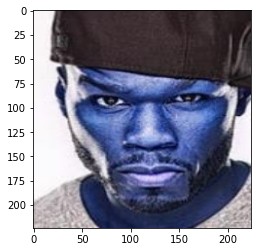

In [126]:
img = Image.fromarray(XTrain[0], 'RGB')
print(YTrain[0])
plt.imshow(img)
plt.show
# Woot, that pic is correct

In [127]:
XTest, YTest = createdataset(valfol)

In [157]:
print(np.array(XTest).shape)
YTest = [ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 11 , 11 , 11 , 11 , 11 , 11 , 11 , 11 , 11 , 11 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 13 , 13 , 13 , 13 , 13 , 13 , 13 , 13 , 13 , 13 , 14 , 14 , 14 , 14 , 14 , 14 , 14 , 14 , 14 , 14 , 15 , 15 , 15 , 15 , 15 , 15 , 15 , 15 , 15 , 15 , 16 , 16 , 16 , 16 , 16 , 16 , 16 , 16 , 16 , 16 , 17 , 17 , 17 , 17 , 17 , 17 , 17 , 17 , 17 , 17 , 18 , 18 , 18 , 18 , 18 , 18 , 18 , 18 , 18 , 18 , 19 , 19 , 19 , 19 , 19 , 19 , 19 , 19 , 19 , 19 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 20 , 20 , 20 , 20 , 20 , 20 , 20 , 20 , 20 , 20 , 21 , 21 , 21 , 21 , 21 , 21 , 21 , 21 , 21 , 21 , 22 , 22 , 22 , 22 , 22 , 22 , 22 , 22 , 22 , 22 , 23 , 23 , 23 , 23 , 23 , 23 , 23 , 23 , 23 , 23 , 24 , 24 , 24 , 24 , 24 , 24 , 24 , 24 , 24 , 24 , 25 , 25 , 25 , 25 , 25 , 25 , 25 , 25 , 25 , 25 , 26 , 26 , 26 , 26 , 26 , 26 , 26 , 26 , 26 , 26 , 27 , 27 , 27 , 27 , 27 , 27 , 27 , 27 , 27 , 27 , 28 , 28 , 28 , 28 , 28 , 28 , 28 , 28 , 28 , 28 , 29 , 29 , 29 , 29 , 29 , 29 , 29 , 29 , 29 , 29 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 30 , 30 , 30 , 30 , 30 , 30 , 30 , 30 , 30 , 30 , 31 , 31 , 31 , 31 , 31 , 31 , 31 , 31 , 31 , 31 , 32 , 32 , 32 , 32 , 32 , 32 , 32 , 32 , 32 , 32 , 33 , 33 , 33 , 33 , 33 , 33 , 33 , 33 , 33 , 33 , 34 , 34 , 34 , 34 , 34 , 34 , 34 , 34 , 34 , 34 , 35 , 35 , 35 , 35 , 35 , 35 , 35 , 35 , 35 , 35 , 36 , 36 , 36 , 36 , 36 , 36 , 36 , 36 , 36 , 36 , 37 , 37 , 37 , 37 , 37 , 37 , 37 , 37 , 37 , 37 , 38 , 38 , 38 , 38 , 38 , 38 , 38 , 38 , 38 , 38 , 39 , 39 , 39 , 39 , 39 , 39 , 39 , 39 , 39 , 39 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 40 , 40 , 40 , 40 , 40 , 40 , 40 , 40 , 40 , 40 , 41 , 41 , 41 , 41 , 41 , 41 , 41 , 41 , 41 , 41 , 42 , 42 , 42 , 42 , 42 , 42 , 42 , 42 , 42 , 42 , 43 , 43 , 43 , 43 , 43 , 43 , 43 , 43 , 43 , 43 , 44 , 44 , 44 , 44 , 44 , 44 , 44 , 44 , 44 , 44 , 45 , 45 , 45 , 45 , 45 , 45 , 45 , 45 , 45 , 45 , 46 , 46 , 46 , 46 , 46 , 46 , 46 , 46 , 46 , 46 , 47 , 47 , 47 , 47 , 47 , 47 , 47 , 47 , 47 , 47 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 48 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 49 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 7 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 8 , 9 , 9 , 9 , 9 , 9 , 9 , 9 , 9 , 9 , 9 ]
print(np.array(YTest).shape)
print(np.array(XTest[0]))

(500, 224, 224, 3)
(500,)
[[[ 52  54  51]
  [ 48  50  47]
  [ 43  45  42]
  ...
  [ 45  55  46]
  [ 48  58  49]
  [ 49  59  50]]

 [[ 51  53  50]
  [ 47  49  46]
  [ 43  45  42]
  ...
  [ 45  55  46]
  [ 47  57  48]
  [ 48  58  49]]

 [[ 49  51  48]
  [ 46  48  45]
  [ 42  44  41]
  ...
  [ 48  56  45]
  [ 48  56  45]
  [ 48  56  45]]

 ...

 [[ 54 103 144]
  [ 57 106 147]
  [ 64 116 155]
  ...
  [ 70 101 130]
  [ 57  88 117]
  [ 51  82 111]]

 [[ 56 108 148]
  [ 58 110 150]
  [ 66 118 158]
  ...
  [ 75 106 135]
  [ 64  95 124]
  [ 60  91 120]]

 [[ 59 111 151]
  [ 59 111 151]
  [ 65 117 157]
  ...
  [ 80 111 140]
  [ 69 100 129]
  [ 65  96 125]]]


In [158]:
XTest = np.array(XTest)
YTest = np.array(YTest).astype('uint8')
print(YTest[0])
print(XTest[0])

0
[[[ 52  54  51]
  [ 48  50  47]
  [ 43  45  42]
  ...
  [ 45  55  46]
  [ 48  58  49]
  [ 49  59  50]]

 [[ 51  53  50]
  [ 47  49  46]
  [ 43  45  42]
  ...
  [ 45  55  46]
  [ 47  57  48]
  [ 48  58  49]]

 [[ 49  51  48]
  [ 46  48  45]
  [ 42  44  41]
  ...
  [ 48  56  45]
  [ 48  56  45]
  [ 48  56  45]]

 ...

 [[ 54 103 144]
  [ 57 106 147]
  [ 64 116 155]
  ...
  [ 70 101 130]
  [ 57  88 117]
  [ 51  82 111]]

 [[ 56 108 148]
  [ 58 110 150]
  [ 66 118 158]
  ...
  [ 75 106 135]
  [ 64  95 124]
  [ 60  91 120]]

 [[ 59 111 151]
  [ 59 111 151]
  [ 65 117 157]
  ...
  [ 80 111 140]
  [ 69 100 129]
  [ 65  96 125]]]


In [164]:
# Last check
print((XTest, YTest))

(array([[[[ 52,  54,  51],
         [ 48,  50,  47],
         [ 43,  45,  42],
         ...,
         [ 45,  55,  46],
         [ 48,  58,  49],
         [ 49,  59,  50]],

        [[ 51,  53,  50],
         [ 47,  49,  46],
         [ 43,  45,  42],
         ...,
         [ 45,  55,  46],
         [ 47,  57,  48],
         [ 48,  58,  49]],

        [[ 49,  51,  48],
         [ 46,  48,  45],
         [ 42,  44,  41],
         ...,
         [ 48,  56,  45],
         [ 48,  56,  45],
         [ 48,  56,  45]],

        ...,

        [[ 54, 103, 144],
         [ 57, 106, 147],
         [ 64, 116, 155],
         ...,
         [ 70, 101, 130],
         [ 57,  88, 117],
         [ 51,  82, 111]],

        [[ 56, 108, 148],
         [ 58, 110, 150],
         [ 66, 118, 158],
         ...,
         [ 75, 106, 135],
         [ 64,  95, 124],
         [ 60,  91, 120]],

        [[ 59, 111, 151],
         [ 59, 111, 151],
         [ 65, 117, 157],
         ...,
         [ 80, 111, 140],
       

10


<function matplotlib.pyplot.show(*args, **kw)>

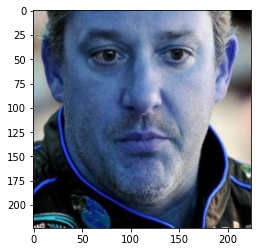

In [160]:
img = Image.fromarray(XTest[21], 'RGB')
print(YTest[21])
plt.imshow(img)
plt.show
# If its 10 then were golden , Woo

In [165]:
# Save all arrays
np.save("XTrain.npy", XTrain)

In [166]:
np.save("YTrain.npy", YTrain)

In [167]:
np.save('XTest.npy', XTest)

In [168]:
np.save('YTest.npy', YTest)